# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [4]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

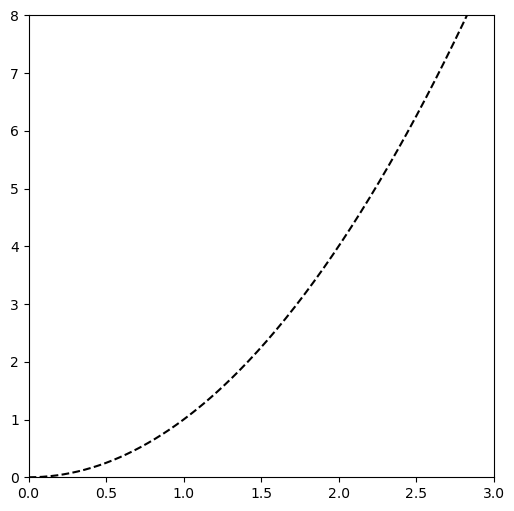

In [5]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

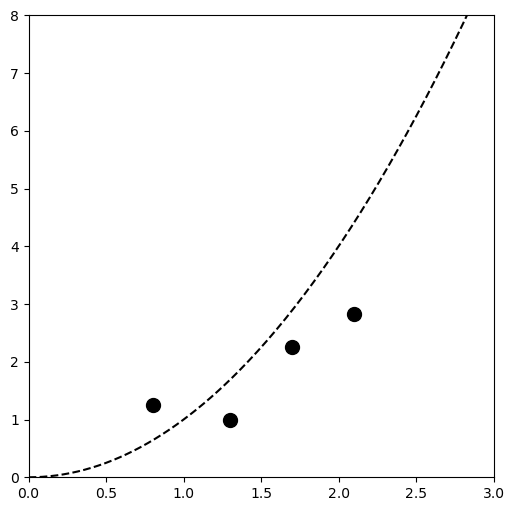

In [6]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [7]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[3.62638688]
-3.0397291262046475


Definiujemy naszą funkcję regresji

In [8]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

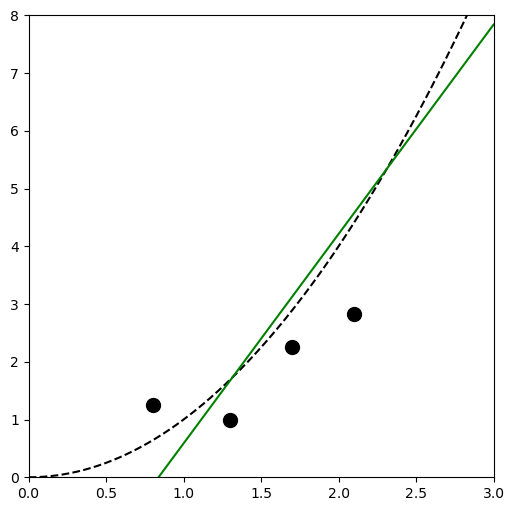

In [9]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [10]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

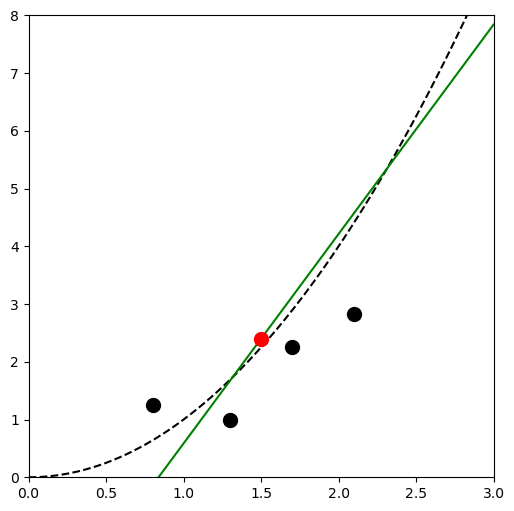

In [11]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [12]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.840634847682034
0.8104228574899084


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [21]:
deg=1
xx=np.vander(x, deg+1 )
xx

ATA = xx.T @ xx
Aty = xx.T @ y
x_hat = np.linalg.solve(ATA, Aty)


In [22]:
x_hat

array([ 3.62638688, -3.03972913])

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [25]:
from scipy import optimize

args = (1,0,1,2,0,1)  # parameter values
def f(x, *args):
    u, v = x
    a, b, c, d, e, f = args
    return a*u**2 + b*u*v + c*v**2 + d*u + e*v + f

def gradf(x, *args):
    u, v = x
    a, b, c, d, e, f = args
    gu = 2*a*u + b*v + d     # u-component of the gradient
    gv = b*u + 2*c*v + e     # v-component of the gradient
    return np.asarray((gu, gv))

x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0, fprime=gradf, args=args)

res1

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3


array([-1.,  0.])

# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [36]:
def compute_error(params,x,y):
    a,b = params
    n=len(x)
    sum =0
    
    for i in range(n):
        sum+= y[i] - (a*x[i] +b)**2
    
    return sum

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [46]:
from scipy.optimize import minimize

# >>> res2 = optimize.minimize(f, x0, jac=gradf, args=args,
# ...                          method='CG', options=opts)


result = minimize(compute_error, x0, args=(x,y))
result

      fun: 12.671313197568654
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([-2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [50]:
def compute_error_1(params, x, y):
    a, b = params
    y_pred = a * x + b
    return np.sum(np.abs(y - y_pred))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [51]:
result = minimize(compute_error_1, x0, args=(x, y))
result

      fun: 7.871307364536214
 hess_inv: array([[ 0.12193388, -0.1054199 ],
       [-0.1054199 ,  0.48987248]])
      jac: array([0.31173778, 0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 231
      nit: 6
     njev: 73
   status: 2
  success: False
        x: array([ 2.79544962, -2.501463  ])

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


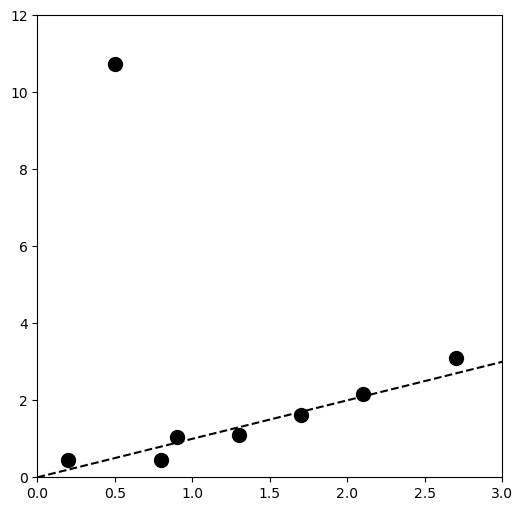

In [55]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [56]:
points = np.column_stack((x,y))

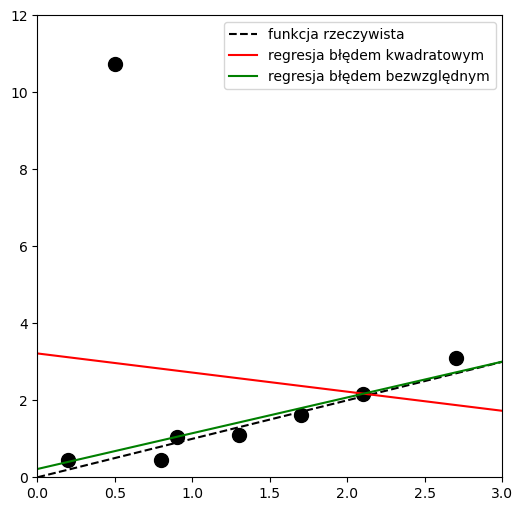

In [57]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# minimalizacja funkcji compute_error dla błędu kwadratowego
result_square = minimize(compute_error, [1, 1], args=(x, y))

# minimalizacja funkcji compute_error dla błędu bezwzględnego
result_abs = minimize(compute_error_1, [1, 1], args=(x, y))

plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x, y, 'ok', ms=10)
plt.plot(x_tr, y_tr, '--k', label='funkcja rzeczywista')
plt.plot(x_tr, result_square.x[0]*x_tr + result_square.x[1], '-r', label='regresja błędem kwadratowym')
plt.plot(x_tr, result_abs.x[0]*x_tr + result_abs.x[1], '-g', label='regresja błędem bezwzględnym')
plt.legend(loc='best')
plt.show()
